<a href="https://colab.research.google.com/github/ernesto-miguez/Machine-Learning-training/blob/master/Python_Numerical_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **14. LINEAR ALGEBRA AND SYSTEMS OF LINEAR EQUATIONS**

## 1. VECTORS

In [ ]:
import numpy as np

In [ ]:
vector_row = np.array([[1, -5, 3, 2, 4]])
vector_column = np.array([[1], 
                          [2], 
                          [3], 
                          [4]])
print(vector_row.shape)
print(vector_column.shape)

(1, 5)
(4, 1)


In [ ]:
from numpy.linalg import norm
new_vector = vector_row.T
print(new_vector)
norm_1 = norm(new_vector, 1)
norm_2 = norm(new_vector, 2)
norm_inf = norm(new_vector, np.inf)
print('L_1 norm of the vector is: %.1f'%norm_1)
print('L_2 norm of the vector is: %.1f'%norm_2)
print('L_inf norm of the vector is: %.1f'%norm_inf)

[[ 1]
 [-5]
 [ 3]
 [ 2]
 [ 4]]
L_1 norm of the vector is: 15.0
L_2 norm of the vector is: 7.4
L_inf norm of the vector is: 5.0


In [ ]:
from numpy import arccos, dot

v = np.array([[10, 9, 3]])
w = np.array([[2, 5, 12]])
theta = \
    arccos(dot(v, w.T)/(norm(v)*norm(w)))
print(theta)

[[0.97992471]]


In [ ]:
v = np.array([[0, 2, 0]])
w = np.array([[3, 0, 0]])
print(np.cross(v, w))

[[ 0  0 -6]]


## Linear combination of vectors

#### Write x vector as a linear combination of v, w, and u

In [ ]:
v = np.array([[0, 3, 2]])
w = np.array([[4, 1, 1]])
u = np.array([[0, -2, 0]])
x = 3*v-2*w+4*u
print(x)

[[-8 -1  4]]


## 2. MATRICES

In [ ]:
P = np.array([[1, 7], [2, 3], [5, 0]])
Q = np.array([[2, 6, 3, 1], [1, 2, 3, 4]])
print(P)
print(Q)
print(np.dot(P, Q))

[[1 7]
 [2 3]
 [5 0]]
[[2 6 3 1]
 [1 2 3 4]]
[[ 9 20 24 29]
 [ 7 18 15 14]
 [10 30 15  5]]


### Determinant of a matrix

In [ ]:
from numpy.linalg import det

M = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])
print('M:\n', M)

print('Determinant: %.1f'%det(M))
I = np.eye(4)
print('I:\n', I)
print('M*I:\n', np.dot(M, I))

M:
 [[0 2 1 3]
 [3 2 8 1]
 [1 0 0 3]
 [0 3 2 1]]
Determinant: -38.0
I:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
M*I:
 [[0. 2. 1. 3.]
 [3. 2. 8. 1.]
 [1. 0. 0. 3.]
 [0. 3. 2. 1.]]


### Determinants and inverses

In [ ]:
from numpy.linalg import inv

print('Inv M:\n', inv(M))
P = np.array([[0,1,0],
              [0,0,0],
              [1,0,1]])
print('det(p):\n', det(P))

Inv M:
 [[-1.57894737 -0.07894737  1.23684211  1.10526316]
 [-0.63157895 -0.13157895  0.39473684  0.84210526]
 [ 0.68421053  0.18421053 -0.55263158 -0.57894737]
 [ 0.52631579  0.02631579 -0.07894737 -0.36842105]]
det(p):
 0.0


M has a nonzero determinant and therefore has inverse. On the other side, the determinant of P = 0 which tells us that P has no inverse

In [ ]:
from numpy.linalg import \
             cond, matrix_rank

A = np.array([[1,1,0],
              [0,1,0],
              [1,0,1]])

print('Condition number:\n', cond(A))
print('Rank:\n', matrix_rank(A))
y = np.array([[1], [2], [1]])
A_y = np.concatenate((A, y), axis = 1)
print('Augmented matrix:\n', A_y)

Condition number:
 4.048917339522305
Rank:
 3
Augmented matrix:
 [[1 1 0 1]
 [0 1 0 2]
 [1 0 1 1]]


### Systems of Linear Equations

### 1. LU decomposition

In [ ]:
import numpy as np

u = np.array([[4, 3, -5], 
              [0, -2.5, 2.5], 
              [0, 0, 12]])
l = np.array([[1, 0, 0], 
              [-0.5, 1, 0], 
              [2, -0.8, 1]])

print('LU=', np.dot(l, u))

LU= [[ 4.  3. -5.]
 [-2. -4.  5.]
 [ 8.  8.  0.]]


### 2. Gauss-Seidel Method

In [ ]:
a = [[8,3,-3], [-2,-8,5], [3,5,10]] 

# Find diagonal coefficients
diag = np.diag(np.abs(a))

# Find row sum wihtout diagonal
off_diag = np.sum(np.abs(a), axis=1) - diag

if np.all(diag > off_diag):
  print('matrix is diagonally dominant')
else:
  print('NOT diagonally dominant')

matrix is diagonally dominant


In [ ]:
x1 = 0
x2 = 0
x3 = 0
epsilon = 0.01
converged = False

x_old = np.array([x1, x2, x3])

print('Iteration results')
print(' k,    x1,    x2,    x3 ')
for k in range(1, 50):
    x1 = (14-3*x2+3*x3)/8
    x2 = (5+2*x1-5*x3)/(-8)
    x3 = (-8-3*x1-5*x2)/(-5)
    x = np.array([x1, x2, x3])
    # check if it is smaller than threshold
    dx = np.sqrt(np.dot(x-x_old, x-x_old))
    
    print("%d, %.4f, %.4f, %.4f"%(k, x1, x2, x3))
    if dx < epsilon:
        converged = True
        print('Converged!')
        break
        
    # assign the latest x value to the old value
    x_old = x

if not converged:
    print('Not converge, increase the # of iterations')

Iteration results
 k,    x1,    x2,    x3 
1, 1.7500, -1.0625, 1.5875
2, 2.7437, -0.3188, 2.9275
3, 2.9673, 0.4629, 3.8433
4, 3.0177, 1.0226, 4.4332
5, 3.0290, 1.3885, 4.8059
6, 3.0315, 1.6208, 5.0397
7, 3.0321, 1.7668, 5.1861
8, 3.0322, 1.8582, 5.2776
9, 3.0322, 1.9154, 5.3348
10, 3.0323, 1.9512, 5.3705
11, 3.0323, 1.9735, 5.3929
12, 3.0323, 1.9875, 5.4068
13, 3.0323, 1.9962, 5.4156
14, 3.0323, 2.0017, 5.4210
Converged!


### Solve Systems of Linear eqations in python

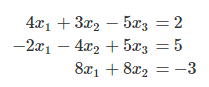

In [ ]:
A = np.array([[4,3,-5],
              [-2,-4,5],
              [8,8,0]])
y = np.array([2, 5, -3])

x = np.linalg.solve(A,y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


The previous code is actually doing a LU decomposition under the hood

### Solving the same equations using the matrix inversion approach

In [ ]:
A_inv = np.linalg.inv(A)

x = np.dot(A_inv, y)
print(x)

[ 2.20833333 -2.58333333 -0.18333333]


### Get the L and U for the above matrix A

In [ ]:
from scipy.linalg import lu

P, L, U = lu(A)
print('P:\n', P)
print('L:\n', L)
print('U:\n', U)
print('LU:\n',np.dot(L, U))

P:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]
L:
 [[ 1.    0.    0.  ]
 [-0.25  1.    0.  ]
 [ 0.5   0.5   1.  ]]
U:
 [[ 8.   8.   0. ]
 [ 0.  -2.   5. ]
 [ 0.   0.  -7.5]]
LU:
 [[ 8.  8.  0.]
 [-2. -4.  5.]
 [ 4.  3. -5.]]


In [ ]:
print(np.dot(P,A))

[[ 8.  8.  0.]
 [-2. -4.  5.]
 [ 4.  3. -5.]]


In [ ]:
A = np.array([[4,3,-5],
              [-2,-4,5],
              [8,8,0]])

B = np.array([[1,6,4],
              [7,-1,3],
              [-8,3,0]])

C = np.array([[6,1,4],
              [1,0,-3],
              [-3,1,1]])

In [ ]:
# A*(B+C)
print(np.dot(A,(B+C)))

[[ 107    5   27]
 [-101   10  -11]
 [ 120   48   64]]


In [ ]:
print(np.dot(A,B) + np.dot(A,C))

[[ 107    5   27]
 [-101   10  -11]
 [ 120   48   64]]


# **15. EIGENVALUES AND EIGENVECTORS**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def plot_vect(x, b, xlim, ylim):
    '''
    function to plot two vectors, 
    x - the original vector
    b - the transformed vector
    xlim - the limit for x
    ylim - the limit for y
    '''
    plt.figure(figsize = (10, 6))
    plt.quiver(0,0,x[0],x[1],\
        color='k',angles='xy',\
        scale_units='xy',scale=1,\
        label='Original vector')
    plt.quiver(0,0,b[0],b[1],\
        color='g',angles='xy',\
        scale_units='xy',scale=1,\
        label ='Transformed vector')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.show()

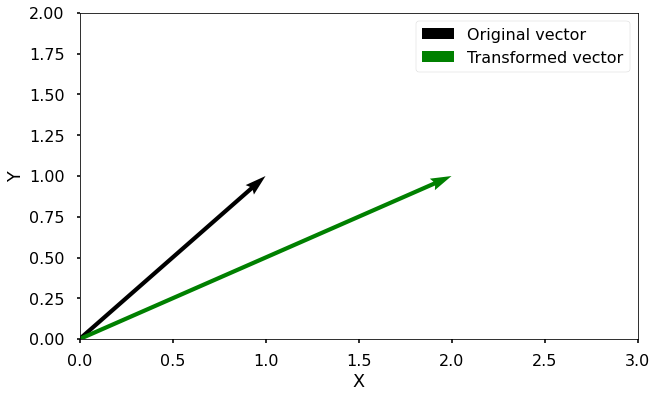

In [ ]:
A = np.array([[2,0],[0,1]])

x = np.array([[1],[1]])
b = np.dot(A,x)
plot_vect(x, b, [0,3], [0,2])

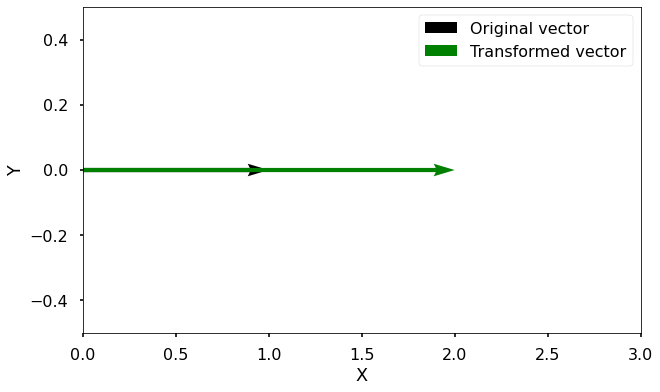

In [ ]:
A = np.array([[2,0],[0,1]])

x = np.array([[1],[0]])
b = np.dot(A,x)
plot_vect(x, b, [0,3], [-0.5,0.5])

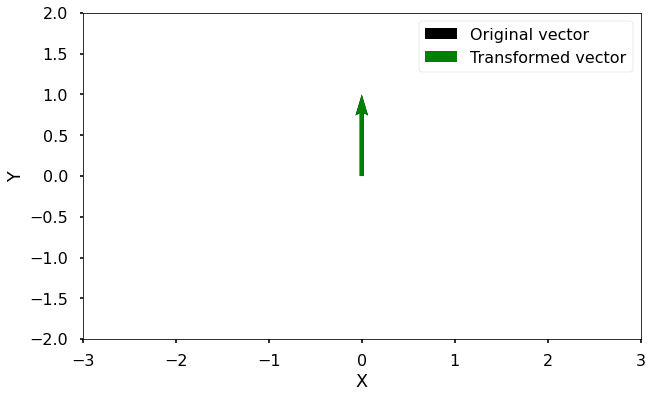

In [ ]:
A = np.array([[2,0],[0,1]])

x = np.array([[0],[1]])
b = np.dot(A,x)
plot_vect(x, b,  [-3,3], [-2,2])

## Calculate eigenvalues and eigenvectors

In [ ]:
a = np.array([[0,2],
              [2,3]])

eigenvalues, eigenvectors = np.linalg.eig(a)
print('E-value:', eigenvalues)
print('E-vector:', eigenvectors)

E-value: [-1.  4.]
E-vector: [[-0.89442719 -0.4472136 ]
 [ 0.4472136  -0.89442719]]


In [ ]:
a = np.array([[2,2,4],
              [1,3,5],
              [2,3,4]])

eigenvalues, eigenvectors = np.linalg.eig(a)
print('E-value:', eigenvalues)
print('E-vector:', eigenvectors)

E-value: [ 8.80916362  0.92620912 -0.73537273]
E-vector: [[-0.52799324 -0.77557092 -0.36272811]
 [-0.604391    0.62277013 -0.7103262 ]
 [-0.59660259 -0.10318482  0.60321224]]


# **16. LEAST SQUARES REGRESSION**

## Direct inverse method

Consider the artificial data created by x = np.linspace(0, 1, 101) and y = 1 + x + x * np.random.random(len(x)). Do a least squares regression with an estimation function defined by y^=α1x+α2. Plot the data points along with the least squares regression. Note that we expect α1=1.5 and α2=1.0 based on this data. Due to the random noise we added into the data, your results maybe slightly different.



In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [ ]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [ ]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [ ]:
# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)
print(alpha)

[[1.54754606]
 [0.98118891]]


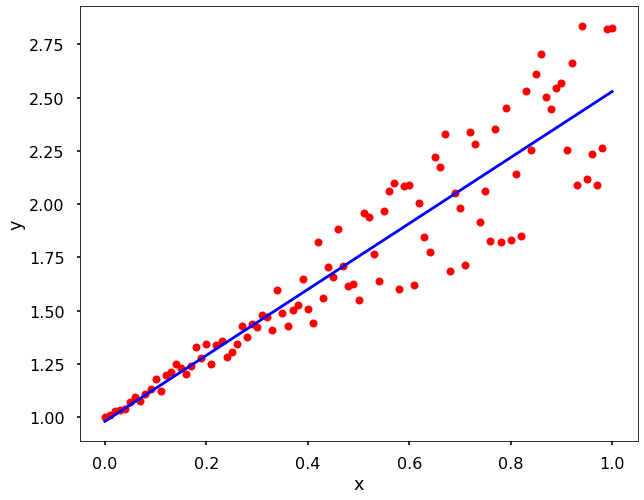

In [ ]:
# Plot the results
plt.figure(figsize= (10,8))
plt.plot(x, y, 'ro', markersize=8)
plt.plot(x, alpha[0]*x + alpha[1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Using numpy.linalg.lstsq to calculate alpha

In [ ]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[1.54754606]
 [0.98118891]]


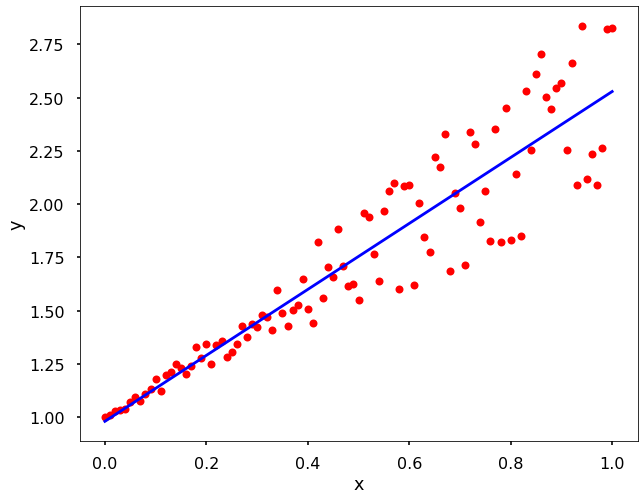

In [ ]:
# Plot the results
plt.figure(figsize= (10,8))
plt.plot(x, y, 'ro', markersize=8)
plt.plot(x, alpha[0]*x + alpha[1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Using optimize.curve_fit from scipy

In [ ]:
# generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

In [ ]:
def func(x, a, b):
  y = a*x + b
  return y

alpha = optimize.curve_fit(func, x, y)[0]
print(alpha)

[1.51815774 1.00714025]


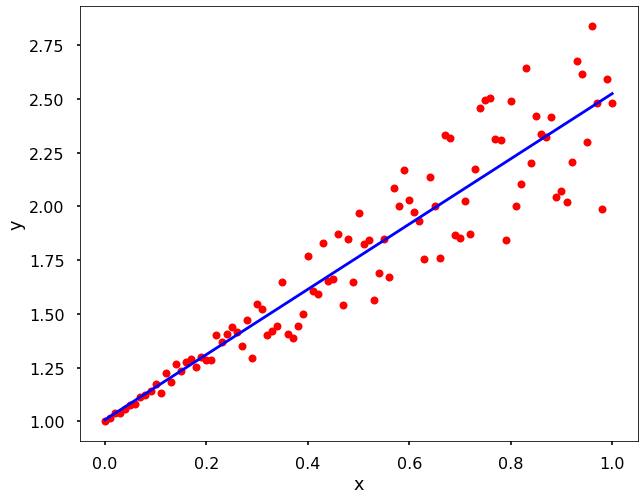

In [ ]:
# Plot the results
plt.figure(figsize= (10,8))
plt.plot(x, y, 'ro', markersize=8)
plt.plot(x, alpha[0]*x + alpha[1], 'b')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Least Square Regression for Nonlinear Functions

In [ ]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

### Exponential functions

For the example below, we will generate data using α=0.1 and β=0.3.

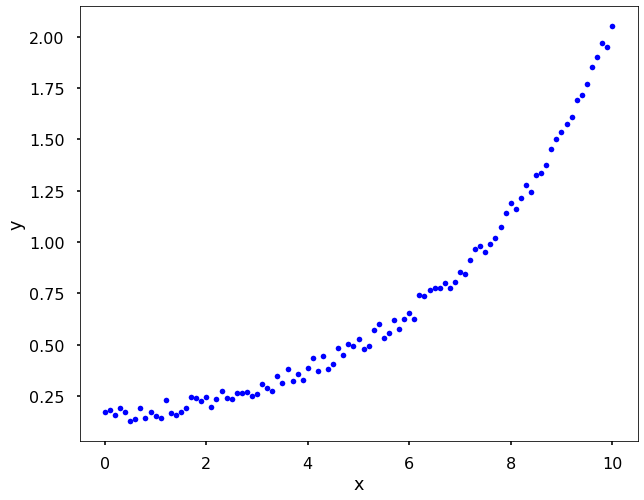

In [ ]:
# let's generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1*np.exp(0.3*x) + 0.1*np.random.random(len(x))
# Let's have a look of the data
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
# Let's fit the data after we applied the log trick
A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond=None)[0]
alpha = np.exp(log_alpha)
print('alpha = {}, beta = {}'.format(alpha, beta))

alpha = 0.13939964108191272, beta = 0.26290333730927384


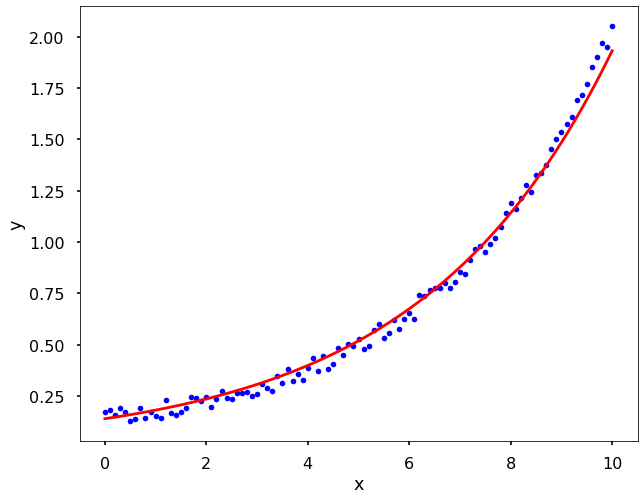

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Polynomial Regression

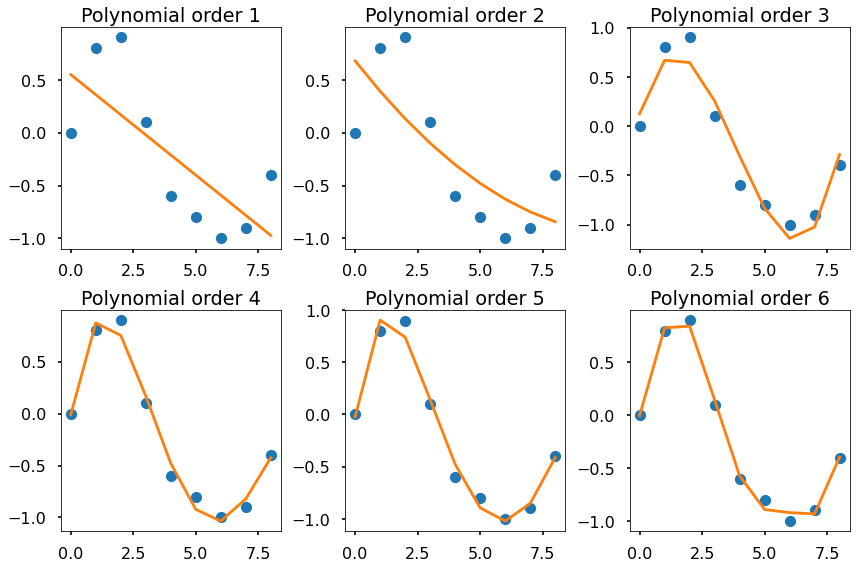

In [ ]:
x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

## Using optimize.curve.fit from scipy

In [ ]:
def func(x, a, b):
  y = a*np.exp(b*x)
  return y

alpha, beta = optimize.curve_fit(func, xdata=x, ydata=y)[0]
print('alpha = {}, beta = {}'.format(alpha, beta))

alpha = 0.12076847022608456, beta = 0.28228591015396864


Text(0.5, 1.0, 'Fitting exponential data')

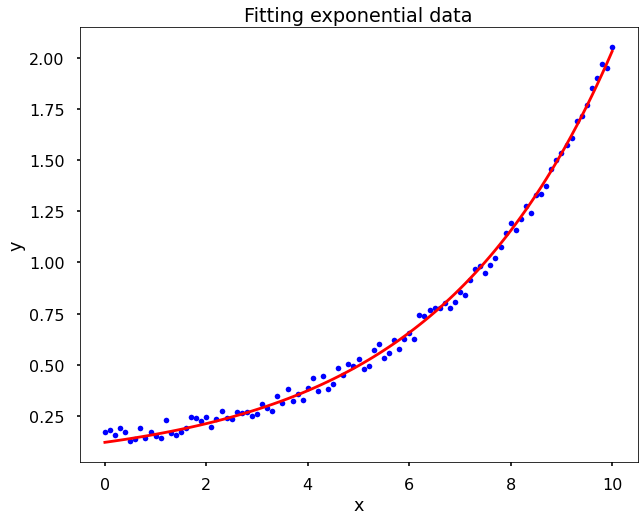

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting exponential data')


# **17. INTERPOLATION**

## Linear interpolation

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [ ]:
x = [0,1,2]
y = [1,3,2]

f = interp1d(x,y)
y_hat = f(1.5)
print(y_hat)

2.5


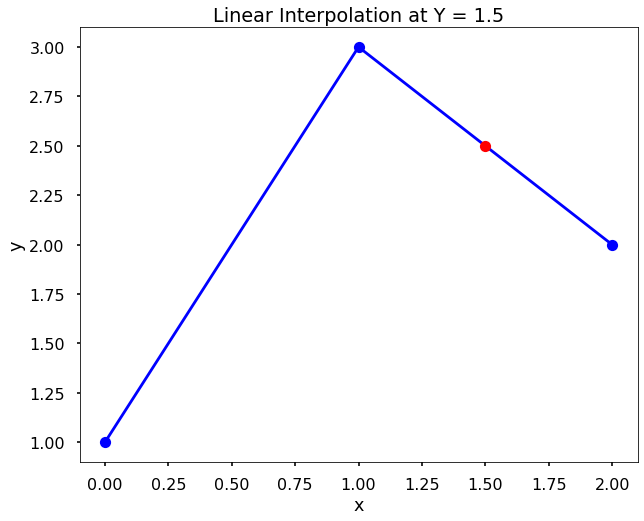

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x, y, '-ob')
plt.plot(1.5, y_hat, 'ro')
plt.title('Linear Interpolation at Y = 1.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Cubic Spline interpolation

In [ ]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

In [ ]:
x = [0,1,2]
y = [1,3,2]

# Use bc_type = 'natural' adds the constraints as we decribed above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0,2,100)
y_new = f(x_new)

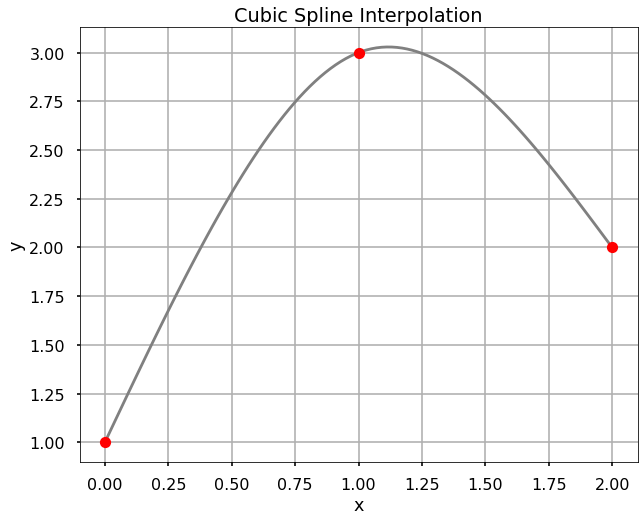

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(x_new, y_new, 'grey')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

In [ ]:
b = np.array([1, 3, 3, 2, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 8, 4, 2, 1], [3, 2, 1, 0, -3, -2, -1, 0], [6, 2, 0, 0, -6, -2, 0, 0],\
             [0, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 12, 2, 0, 0]])

In [ ]:
np.dot(np.linalg.inv(A), b)

array([[-0.75],
       [ 0.  ],
       [ 2.75],
       [ 1.  ],
       [ 0.75],
       [-4.5 ],
       [ 7.25],
       [-0.5 ]])

Therefore, the two cubic polynomials are:

       S1(x) = −.75x3+2.75x+1, for 0≤x≤1 and
       S2(x) = .75x3−4.5x2+7.25x−.5, for 1≤x≤2


So for x=1.5 we evaluate S2(1.5) and get an estimated value of 2.7813.



## Lagrange Polynomial Interpolation

In [ ]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

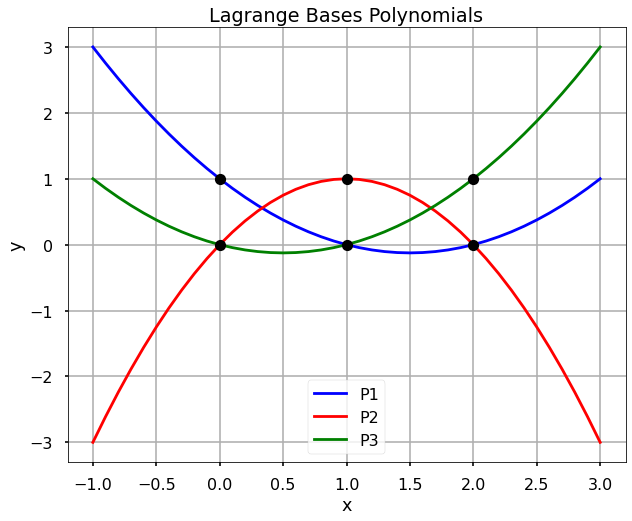

In [ ]:
x = [0, 1, 2]
y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]
P2_coeff = [0, 2,-1]
P3_coeff = [0,-.5,.5]

# get the polynomial function
P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Bases Polynomials')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

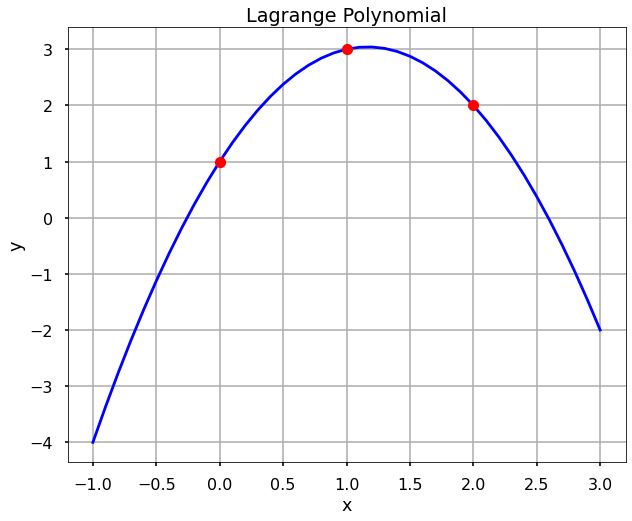

In [ ]:
L = P1 + 3*P2 + 2*P3

fig = plt.figure(figsize=(10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
P1

Polynomial([ 1. , -1.5,  0.5], domain=[-1,  1], window=[-1,  1])

# Newton's Polynomial Interpolation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [ ]:
def divided_diff(x, y):
  '''
  Function to calculate the divided differences table
  '''
  n = len(y)
  coef = np.zeros([n,n])
  # The first column is y
  coef[:,0] = y

  for j in range(1,n):
    for i in range(n-j):
      coef[i][j] = \
      (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
  
  return coef


def newton_poly(coef, x_data, x):
  '''
  Evaluate the newton polynomial at x
  '''
  n = len(x_data) - 1
  p = coef[n]
  for k in range(1,n+1):
    p = coef[n-k] + (x -x_data[n-k])*p
  return p

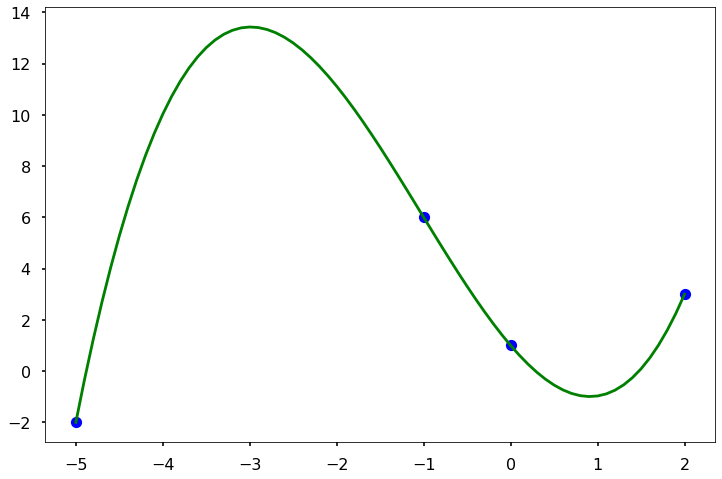

In [ ]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])
# Get the divided difference coef
a_s = divided_diff(x, y)[0, :]

# Evaluate on new data points
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize=(12,8))
plt.plot(x,y, 'bo')
plt.plot(x_new, y_new, 'g')
plt.show()

#**18. SERIES**

## Approximations with Taylor Series

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

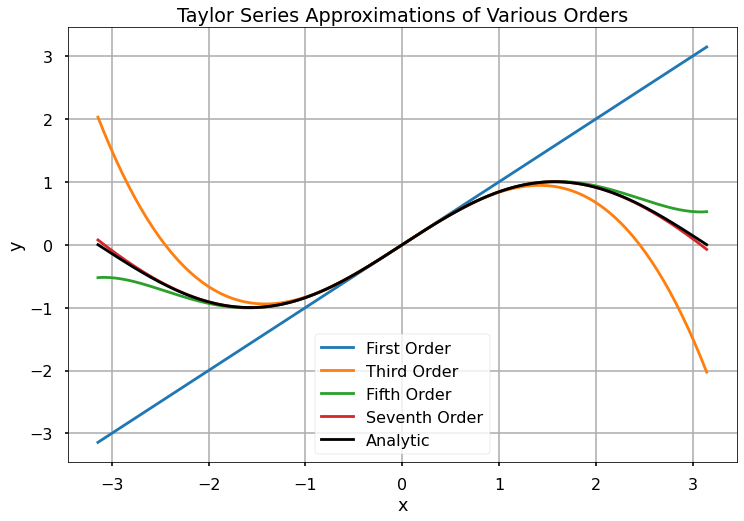

In [ ]:
x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize=(12,8))
for n, label in zip(range(4), labels):
  y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
  plt.plot(x,y, label=label)

plt.plot(x, np.sin(x), 'k', label='Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
x = np.pi/2
y = 0

for n in range(4):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    
print(y)

0.9998431013994987


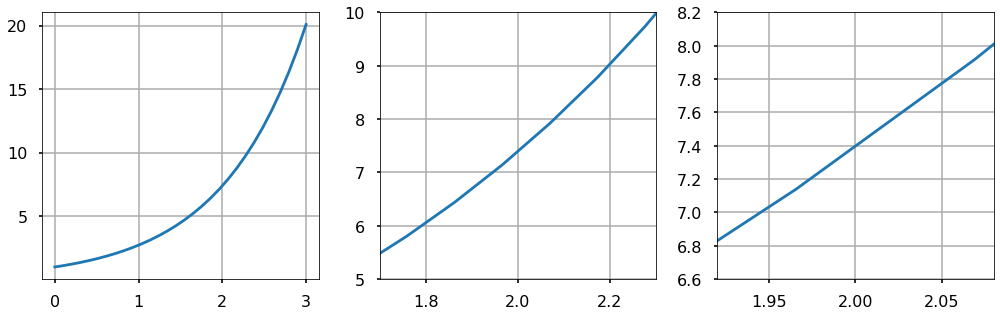

In [ ]:
x = np.linspace(0, 3, 30)
y = np.exp(x)

plt.figure(figsize = (14, 4.5))
plt.subplot(1, 3, 1)
plt.plot(x, y)
plt.grid()
plt.subplot(1, 3, 2)
plt.plot(x, y)
plt.grid()
plt.xlim(1.7, 2.3)
plt.ylim(5, 10)
plt.subplot(1, 3, 3)
plt.plot(x, y)
plt.grid()
plt.xlim(1.92, 2.08)
plt.ylim(6.6, 8.2)
plt.tight_layout()
plt.show()

## Discussion on Errors

In [ ]:
import numpy as np

In [ ]:
exp = 0
x = 2
for i in range(10):
  exp = exp + \
      ((x**i)/np.math.factorial(i))
  print(f'Using {i}-term -> {exp}')

print(f'The true e^2 is: \n{np.exp(2)}')

Using 0-term -> 1.0
Using 1-term -> 3.0
Using 2-term -> 5.0
Using 3-term -> 6.333333333333333
Using 4-term -> 7.0
Using 5-term -> 7.266666666666667
Using 6-term -> 7.355555555555555
Using 7-term -> 7.3809523809523805
Using 8-term -> 7.387301587301587
Using 9-term -> 7.3887125220458545
The true e^2 is: 
7.38905609893065


In [ ]:
abs(7.3887125220458545 - np.exp(2))

0.0003435768847959153

In [ ]:
exp = 0
x = -30
for i in range(200):
  exp = exp + \
      ((x**i)/np.math.factorial(i))
  
print(f'Using {i}-term -> {exp}')
print(f'The true e^-30 is: \n{np.exp(x)}')

Using 199-term -> -8.553016433669241e-05
The true e^-30 is: 
9.357622968840175e-14


#**19. ROOT FINDING**

In [ ]:
import numpy as np
from scipy import optimize

f = lambda x: np.cos(x) - x
r, infodict, ier, mesg = optimize.fsolve(f, -2, full_output=True)
print("r =", r)

# Verify the solution is a root
result = f(r)
print("result=", result)
print(mesg)

r = [0.73908513]
result= [0.]
The solution converged.


In [ ]:
f = lambda x: 1/x
r, infodict, ier, msg = optimize.fsolve(f, -2, full_output=True)
print("r = ", r)

result = f(r)
print("result=", result)
print(msg)

r =  [-3.52047359e+83]
result= [-2.84052692e-84]
The number of calls to function has reached maxfev = 400.


## Bisection method

Program a function my_bisection(f, a, b, tol) that approximates a root r of f, bounded by a and b to within

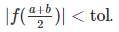



In [ ]:
import numpy as np

In [ ]:
def my_bisection(f, a, b, tol):
  '''
  approximates a root, R, of f bounded 
  by a and b to within tolerance 
  | f(m) | < tol with m the midpoint 
  between a and b Recursive implementation
  '''


  # Check if a and b bound a root
  if np.sign(f(a)) == np.sign(f(b)):
    raise Exception("The scalars a and b do not bound a root")

  # Get the midpoint
  m = (a + b)/2

  if np.abs(f(m)) < tol:
    # Report m as a root
    return m
  elif np.sign(f(a)) == np.sign(f(m)):
    # Case where m is an improvement on a
    # Make recursive call with a = m
    return my_bisection(f, m, b, tol)
  elif np.sign(f(b)) == np.sign(f(m)):
    # Case where m is an improvement on b
    # Make recursive call with b = m
    return my_bisection(f, a, m, tol)

The √2 can be computed as the root of the function f(x)=x^2−2. Starting at a=0 and b=2, use my_bisection to approximate the √2 to a tolerance of |f(x)|<0.1 and |f(x)|<0.01. Verify that the results are close to a root by plugging the root back into the function.

In [ ]:
f = lambda x: x**2 - 2
t1 = 0.1
t2 = 0.01


r1 = my_bisection(f, 0, 2, t1)
print("r1 = ", r1)
r2 = my_bisection(f, 0, 2, t2)
print("r2 = ", r2)

print("f(r1) = ", f(r1))
print("f(r2) = ", f(r2))

r1 =  1.4375
r2 =  1.4140625
f(r1) =  0.06640625
f(r2) =  -0.00042724609375


## Newton-Raphson Method

In [ ]:
import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4) / f_prime(1.4))

print("newton_raphson = ", newton_raphson)
print("sqrt(2) = ", np.sqrt(2))

newton_raphson =  1.4142857142857144
sqrt(2) =  1.4142135623730951


In [ ]:
def my_newton(f, df, x0, tol):
  '''
  Outuput is an estimation of the root of f
  using the Newton Raphson method recursive implantation
  '''

  if abs(f(x0)) < tol:
    return x0
  else:
    return my_newton(f, df, x0 - f(x0) / df(x0), tol)

In [ ]:
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("Estimate =", estimate)
print("Sqrt(2) =", np.sqrt(2))

Estimate = 1.4142135623746899
Sqrt(2) = 1.4142135623730951


TRY IT! Compute a single Newton step to get an improved approximation of the root of the function f(x)=x3+3x2−2x−5 and an initial guess, x0=0.29.

In [ ]:
x0 = 0.29
x1 = x0-(x0**3+3*x0**2-2*x0-5) / (3*x0**2+6*x0-2)
print("x1 =", x1)

x1 = -688.4516883116648


TRY IT! Compute the root of the function f(x)=x3−100x2−x+100 using f_solve.

In [ ]:
from scipy.optimize import fsolve

In [ ]:
f = lambda x: x**3 - 100*x**2 - x + 100
fsolve(f, [2, 80])

array([  1., 100.])

# **20. NUMERICAL DIFFERENTIATION**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

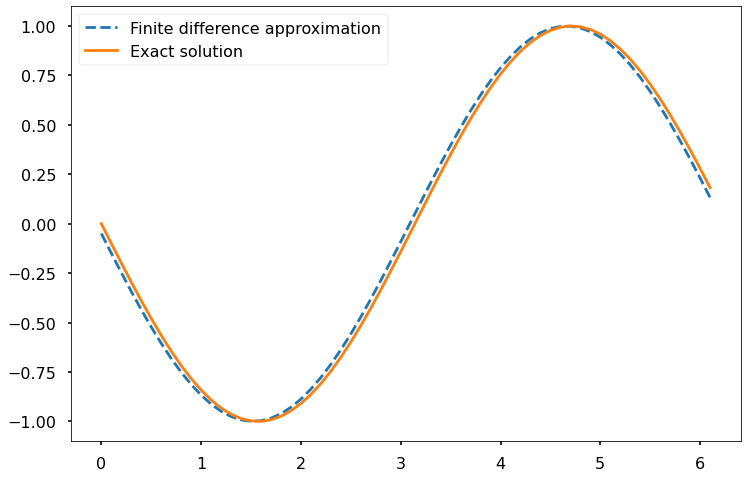

0.049984407218554114


In [ ]:
# step size
h = 0.1

# Define grid
x = np.arange(0, 2*np.pi, h)
y = np.cos(x)

# Compute vector of forward differences
forward_diff = np.diff(y)/h
# Compute corresponding grid
x_diff = x[:-1:]
# Compute exact solustion
exact_solution = -np.sin(x_diff)

# Plot solution
plt.figure(figsize=(12,8))
plt.plot(x_diff, forward_diff, '--', label = 'Finite difference approximation')
plt.plot(x_diff, exact_solution, label = 'Exact solution')
plt.legend()
plt.show()

# Compute max error between numerical derivative and exact solution
max_error = max(abs(exact_solution - forward_diff))
print(max_error)

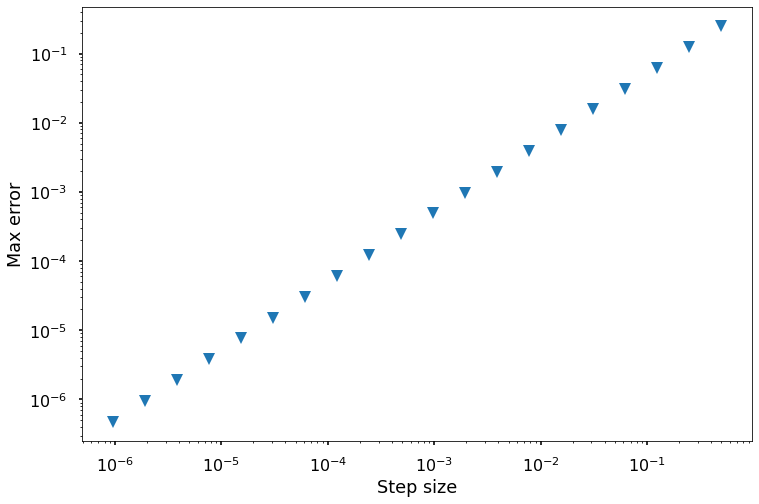

In [ ]:
# Define step size
h = 1
# Define number of iterations to perform
iterations = 20
# List to store our step sizes
step_size = []
# List to store max error for each step size
max_error = []

for i in range(iterations):
  # Halve the step size
  h /= 2
  # Store the step size
  step_size.append(h)
  # Compute new grid
  x = np.arange(0, 2*np.pi, h)
  # Compute function value at grid
  y = np.cos(x)
  # Compute vector of forward differences
  forward_diff = np.diff(y)/h
  # Compute corresponding grid
  x_diff = x[:-1]
  # Compute exact solution
  exact_solution = -np.sin(x_diff)

  # Compute max error between numerical derivative and exact solution
  max_error.append(max(abs(exact_solution - forward_diff)))

# Producte log-log plot of max error verus step size
plt.figure(figsize=(12,8))
plt.loglog(step_size, max_error, 'v')
plt.xlabel('Step size')
plt.ylabel('Max error')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

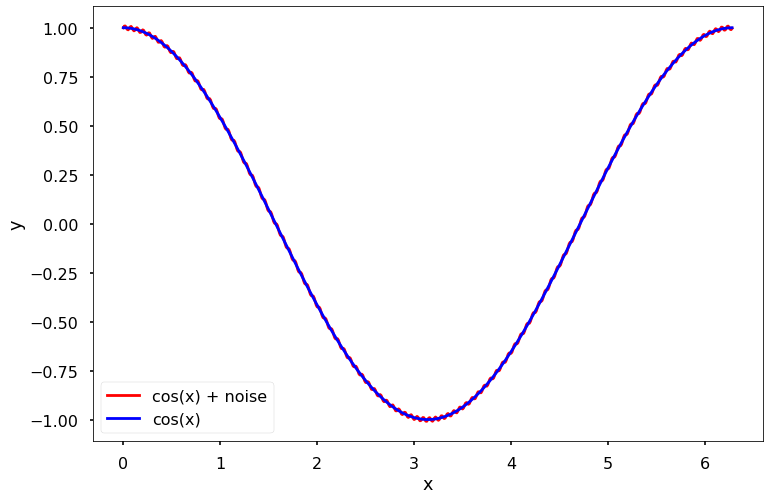

In [ ]:
x = np.arange(0, 2*np.pi, 0.01)
# Compute function
omega = 100
epsilon = 0.01

y = np.cos(x)
y_noise = y + epsilon*np.sin(omega*x)

# Plot solution
plt.figure(figsize= (12,8))
plt.plot(x, y_noise, 'r-', \
         label = 'cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

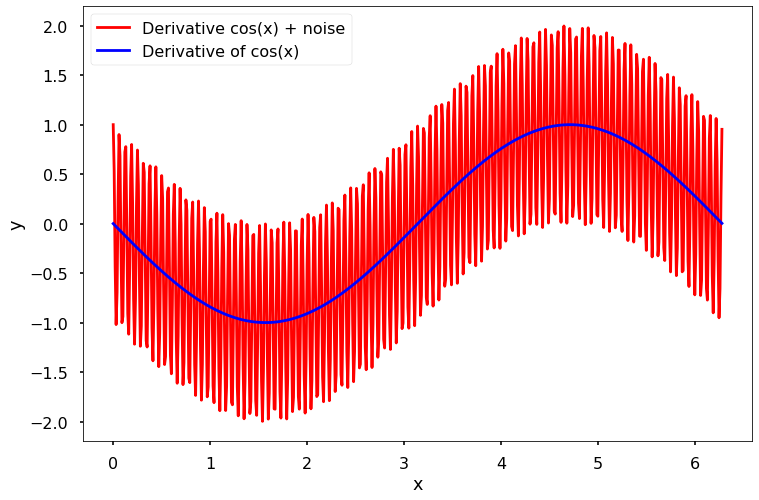

In [ ]:
x = np.arange(0, 2*np.pi, 0.01)
# Compute function
y = -np.sin(x)
y_noise = y + epsilon*omega*np.cos(omega*x)

# Plot solution
plt.figure(figsize=(12,8))
plt.plot(x, y_noise, 'r-', \
         label = 'Derivative cos(x) + noise')
plt.plot(x, y, 'b-', \
         label = 'Derivative of cos(x)')

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()

# **21. NUMERICAL INTEGRATION**







## Riemanns Integral

TRY IT! Use the left Riemann Integral, right Riemann Integral, and Midpoint Rule to approximate image.pngwtih 11 evenly spaced grid ponts over the whole interval. Compare this value to the exact value of 2.

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b-a) / (n-1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_riemannL = h * sum(f[:n-1])
err_riemannL = 2 - I_riemannL

I_riemannR = h * sum(f[1::])
err_riemannR = 2 - I_riemannR

I_mid = h * sum(np.sin((x[:n-1] \
        + x[1:])/2))
err_mid = 2 - I_mid

print(I_riemannL)
print(err_riemannL)

print(I_riemannR)
print(err_riemannR)

print(I_mid)
print(err_mid)

1.9835235375094546
0.01647646249054535
1.9835235375094546
0.01647646249054535
2.0082484079079745
-0.008248407907974542


## Trapezoid rule

TRY IT! Use the Trapezoid Rule to approximate 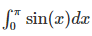 with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trap = (h/2)*(f[0] + \
          2 * sum(f[1:n-1]) + f[n-1])
err_trap = 2 - I_trap

print(I_trap)
print(err_trap)

1.9835235375094546
0.01647646249054535


TRY IT! Use the Simpson's Rule to approximate 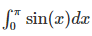 with 11 evenly spaced grid points over the whole interval. Compare this value to the exact value of 2.

In [ ]:
import numpy as np

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_simp = (h/3) * (f[0] + 2*sum(f[:n-2:2]) \
            + 4*sum(f[1:n-1:2]) + f[n-1])
err_simp = 2 - I_simp

print(I_simp)
print(err_simp)

2.0001095173150043
-0.00010951731500430384


## Computing integrals in Python

In [ ]:
import numpy as np
from scipy.integrate import trapz

a = 0
b = np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

I_trapz = trapz(f,x)
I_trap = (h/2)*(f[0] + 2 * sum(f[1:n-1]) + f[n-1])

print(I_trapz)
print(I_trap)

1.9835235375094544
1.9835235375094546


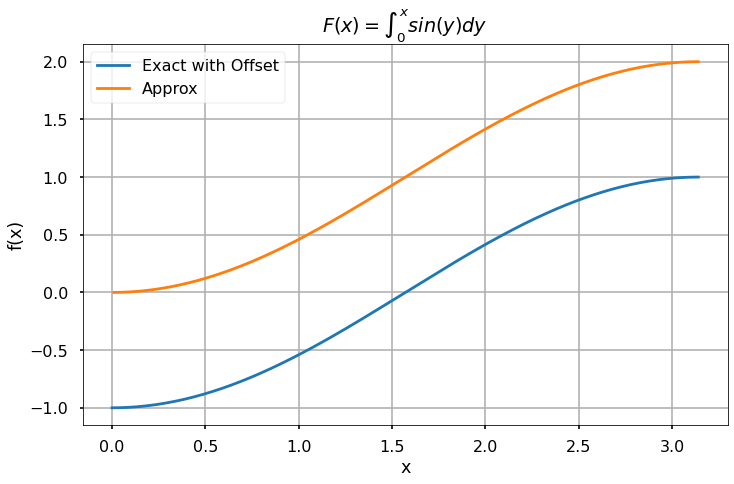

In [ ]:
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn-poster')

x = np.arange(0, np.pi, 0.01)
F_exact = -np.cos(x)
F_approx = cumtrapz(np.sin(x), x)

plt.figure(figsize = (10,6))
plt.plot(x, F_exact)
plt.plot(x[1::], F_approx)
plt.grid()
plt.tight_layout()
plt.title('$F(x) = \int_0^{x} sin(y) dy$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(['Exact with Offset', 'Approx'])
plt.show()

In [ ]:
from scipy.integrate import quad 

I_quad, est_err_quad = \
          quad(np.sin, 0, np.pi)
print(I_quad)
err_quad = 2 - I_quad
print(est_err_quad, err_quad)

2.0
2.220446049250313e-14 0.0


TRY IT! The differential equation 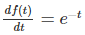 with initial condition f0=−1 has the exact solution f(t)=−e−timage.png. Approximate the solution to this initial value problem between 0 and 1 in increments of 0.1 using the Explicity Euler Formula. Plot the difference between the approximated solution and the exact solution.

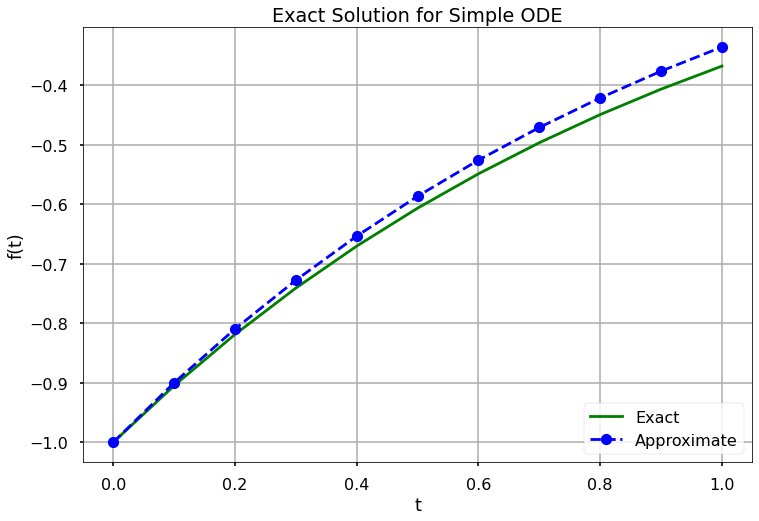

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# Parameters
f = lambda t, s: np.exp(-t)
h = 0.1 # Step size
t = np.arange(0, 1+h, h)
s0 = -1

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0


for i in range(0, len(t) - 1):
  s[i + 1] = s[i] + h*f(t[i], s[i])


plt.figure(figsize = (12,8))
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.plot(t, s, 'bo--', label='Approximate')
plt.title("Exact Solution for Simple ODE")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

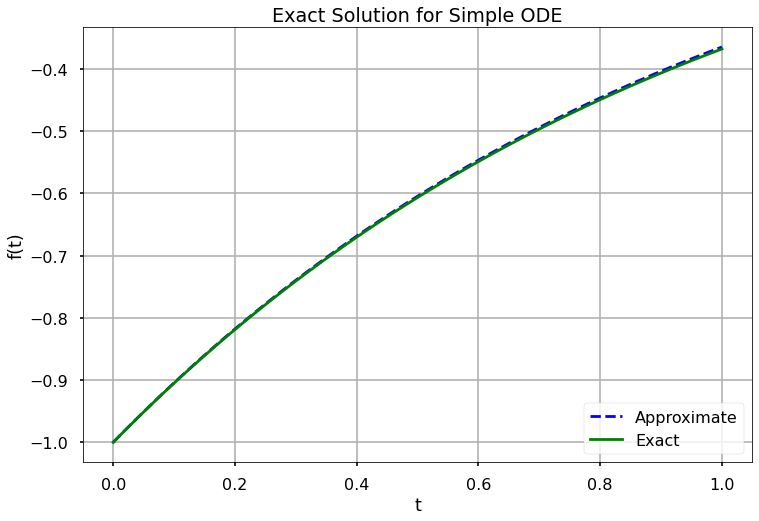

In [ ]:
# Parameters
h = 0.01 # Step size
t = np.arange(0, 1+h, h)
s0 = -1

# Explicit Euler Method
s = np.zeros(len(t))
s[0] = s0


for i in range(0, len(t) - 1):
  s[i + 1] = s[i] + h*f(t[i], s[i])


plt.figure(figsize = (12,8))
plt.plot(t, s, 'b--', label='Approximate')
plt.plot(t, -np.exp(-t), 'g', label='Exact')
plt.title("Exact Solution for Simple ODE")
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

TRY IT! Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval [0,5] in increments of 0.1 and for an initial solution of 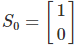. For the model parameters using 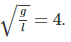. Plot the approximate solution on a single graph

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

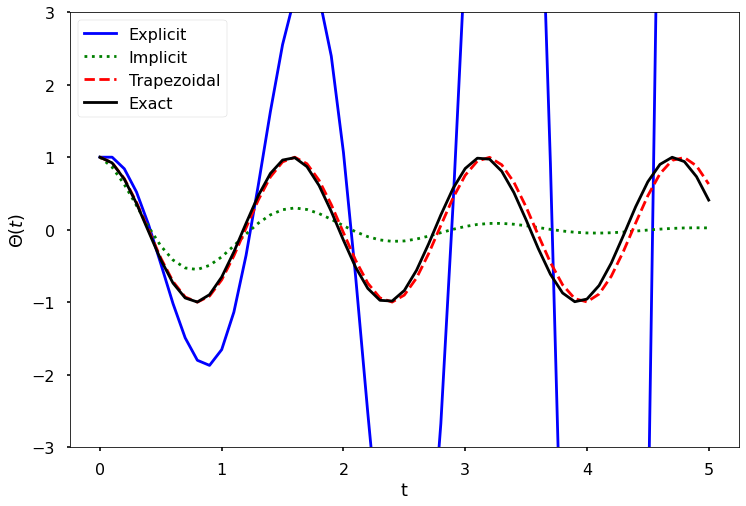

In [ ]:
# Step size
h = 0.1
# Numerical grid
t = np.arange(0, 5.1, h)
# Oscillation freq. of the pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
                [-w**2*h, 1]])
m_i = inv([[1, -h],
                [w**2*h, 1]])

m_t = np.dot(inv(np.array([[1, -h/2],
                           [w**2*h/2, 1]])), np.array(
                               [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# Do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
  s_e[j+1, :] = np.dot(m_e, s_e[j, :])
  s_i[j+1, :] = np.dot(m_i, s_i[j, :])
  s_t[j+1, :] = np.dot(m_t, s_t[j, :])

plt.figure(figsize = (12,8))
plt.plot(t, s_e[:,0], 'b-')
plt.plot(t, s_i[:,0], 'g:')
plt.plot(t, s_t[:,0], 'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3,3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

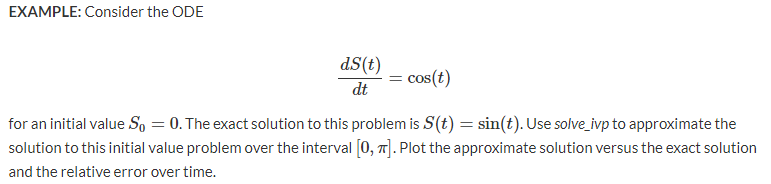

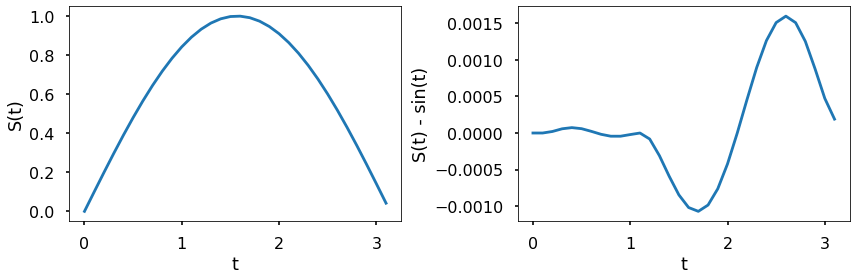

In [ ]:
from scipy.integrate import solve_ivp

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(1,2,2)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

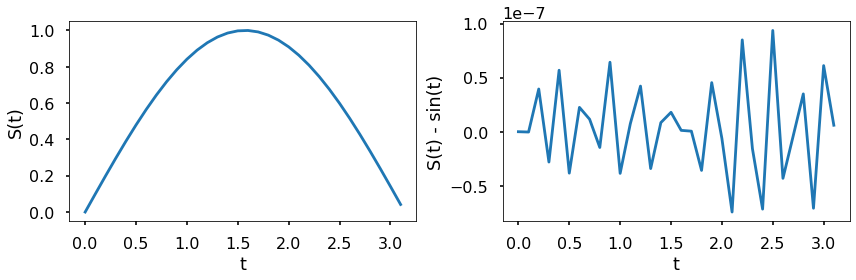

In [ ]:
t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(1,2,2)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

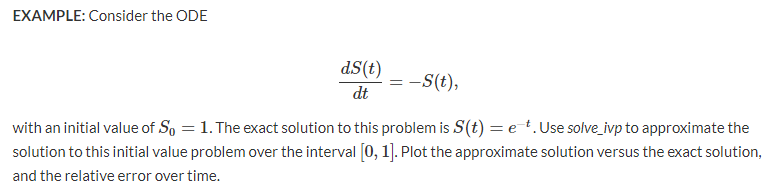

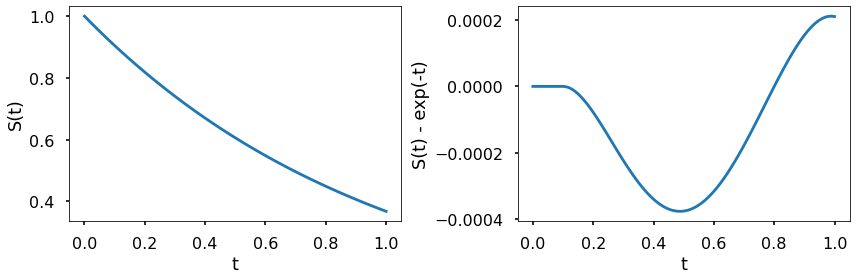

In [ ]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(1,2,2)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

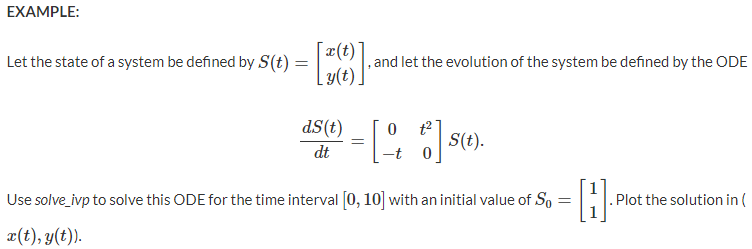

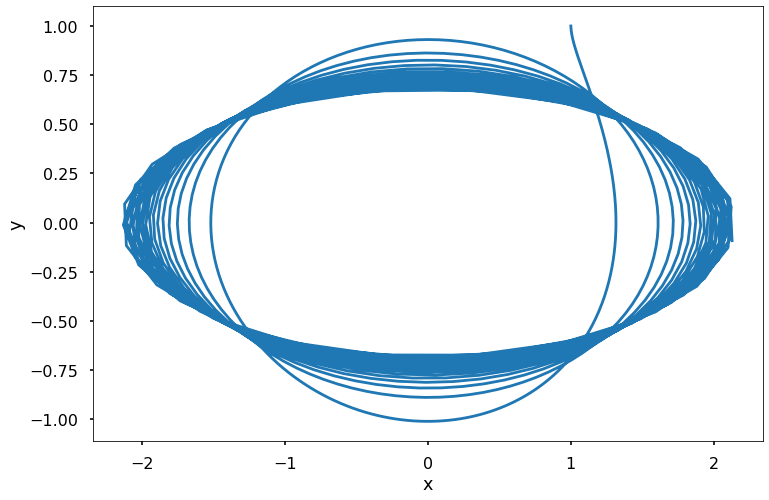

In [ ]:
F = lambda t, s: np.dot(np.array([[0, t**2], 
                                  [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1,1], t_eval=t_eval)

plt.figure(figsize = (12,8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# **23. ODE. Boundary Value Problems**


## The Shooting Methods

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn-poster')
%matplotlib inline

We first guess the velocity at launching is 25 m/s

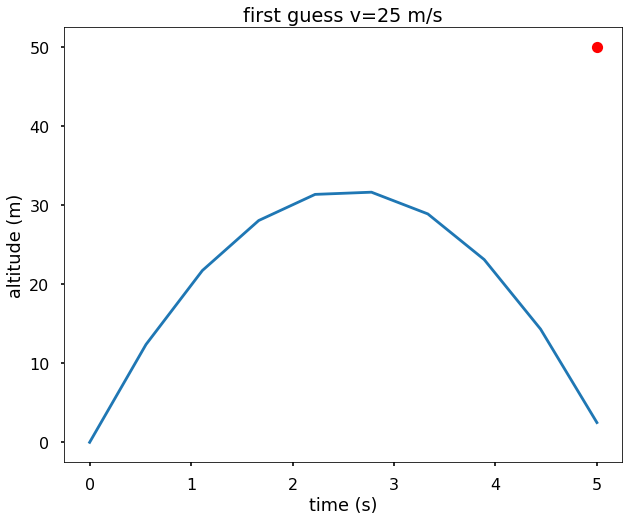

In [ ]:
F = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0,5,100)
y0 = 0
v0 = 25
t_eval = np.linspace(0,5,10)
sol = solve_ivp(F, [0,5], \
                [y0,v0], t_eval=t_eval)

plt.figure(figsize=(10,8))
plt.plot(sol.t, sol.y[0])
plt.plot(5,50,'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

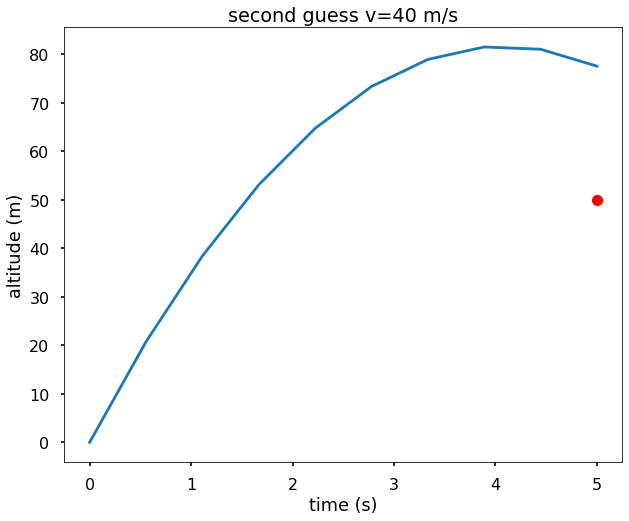

In [ ]:
v0 = 40
sol = solve_ivp(F, [0,5], \
                [y0,v0], t_eval=t_eval)

plt.figure(figsize=(10,8))
plt.plot(sol.t, sol.y[0])
plt.plot(5,50,'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'second guess v={v0} m/s')
plt.show()

Use fsolve to find the root

In [ ]:
from scipy.optimize import fsolve

def objective(v0):
  sol = solve_ivp(F, np.array([0,5], dtype=object), \
                  np.array([y0, v0], dtype=object), t_eval=t_eval)
  y = sol.y[0]
  return [y[-1] - 50]
  
v0, = fsolve(objective, 10)
print(v0)

34.499999999999986


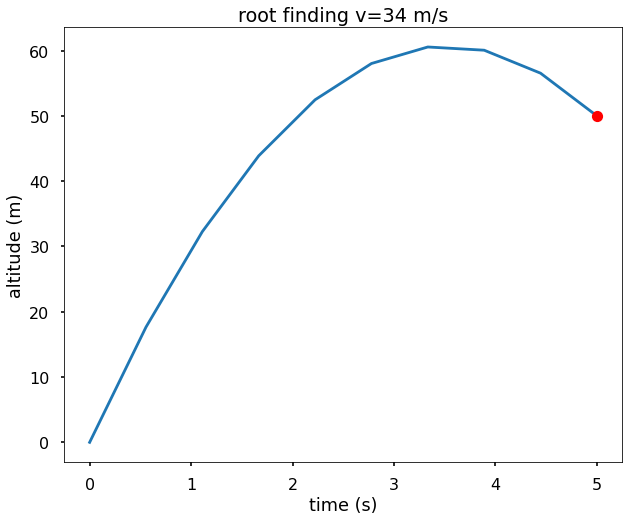

In [ ]:
sol = solve_ivp(F, [0,5], \
                [y0,v0], t_eval=t_eval)

plt.figure(figsize=(10,8))
plt.plot(sol.t, sol.y[0])
plt.plot(5,50,'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'root finding v={round(v0)} m/s')
plt.show()

Changing the initial guess

In [ ]:
for v0_guess in range(1,100,10):
  v0, = fsolve(objective, v0_guess)
  print('Init: %d, Result: %.1f' \
        %(v0_guess, v0))

Init: 1, Result: 34.5
Init: 11, Result: 34.5
Init: 21, Result: 34.5
Init: 31, Result: 34.5
Init: 41, Result: 34.5
Init: 51, Result: 34.5
Init: 61, Result: 34.5
Init: 71, Result: 34.5
Init: 81, Result: 34.5
Init: 91, Result: 34.5


## Finite Difference Method

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


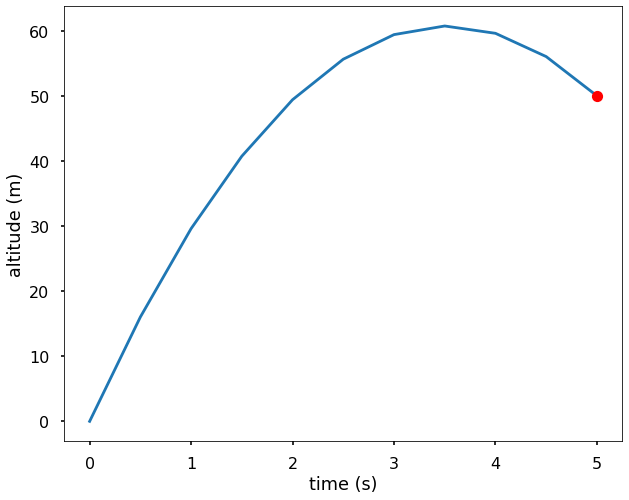

In [ ]:
n = 10
h = (5-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
  A[i, i-1] = 1
  A[i, i] = -2
  A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[1:-1] = -9.8*h**2
b[-1] = 50
print(b)

# Solve the linear equations
y = np.linalg.solve(A, b)

t = np.linspace(0,5,11)

plt.figure(figsize=(10,8))
plt.plot(t, y)
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.show()

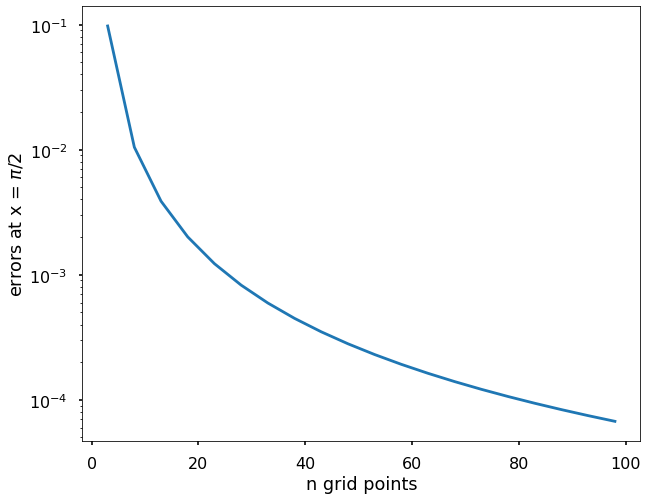

In [ ]:
def get_a_b(n):
    h = (np.pi/2-0) / n
    x = np.linspace(0, np.pi/2, n+1)
    # Get A
    A = np.zeros((n+1, n+1))
    A[0, 0] = 1
    A[n, n] = -2+4*h**2
    A[n, n-1] = 2
    for i in range(1, n):
        A[i, i-1] = 1
        A[i, i] = -2+4*h**2
        A[i, i+1] = 1

    # Get b
    b = np.zeros(n+1)
    for i in range(1, n+1):
        b[i] = 4*h**2*x[i]
    
    return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
    x, A, b = get_a_b(n)
    y = np.linalg.solve(A, b)
    n_s.append(n)
    e = v - y[-1]
    errors.append(e)


plt.figure(figsize=(10,8))
plt.plot(n_s, errors)
plt.yscale('log')
plt.xlabel('n grid points')
plt.ylabel('errors at x = $\pi/2$')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_bvp
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

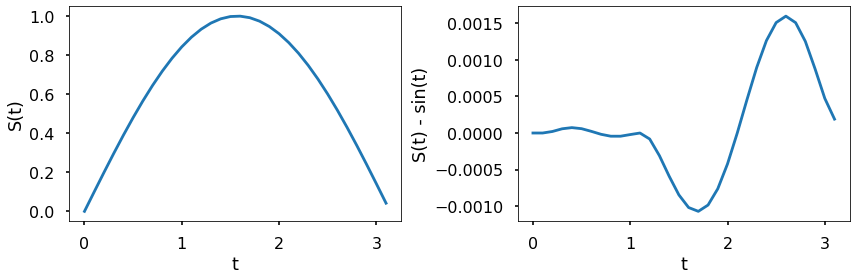

In [ ]:
F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, .1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)


plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

In [ ]:
def fun(t, y):
    print(y[1].shape)
    return np.vstack((y[1], -9.8))

f = lambda t, s: \
  np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

In [ ]:
t = np.linspace(0, 5, 11)

y_a = np.zeros((2, t.size))
y_a[-1]= 50

res_a = solve_bvp(f, bc, t, y_a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """


ValueError: ignored

In [ ]:
def fun(x, y):
    return np.vstack((y[1], -np.exp(y[0])))

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

x = np.linspace(0, 1, 5)

y_a = np.zeros((2, x.size))
y_b = np.zeros((2, x.size))
#y_b[0] = 3

In [ ]:
res_a = solve_bvp(fun, bc, x, y_a)


In [ ]:
res_b = solve_bvp(fun, bc, x, y_a)

In [ ]:
res_a.y

array([[ 0.00000000e+00,  1.04784145e-01,  1.40534773e-01,
         1.04784145e-01,  0.00000000e+00],
       [ 5.49349275e-01,  2.84320977e-01, -2.14587592e-18,
        -2.84320977e-01, -5.49349275e-01]])

#**24. Fourier Transform**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

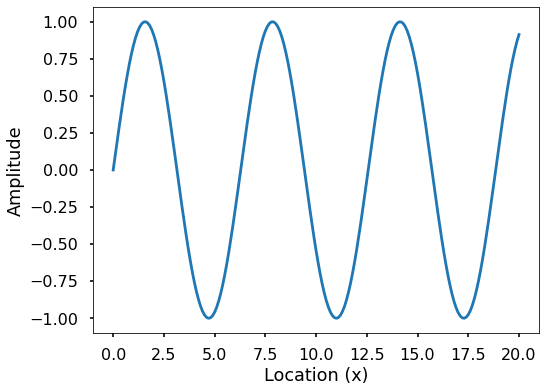

In [ ]:
x = np.linspace(0, 20, 201)
y = np.sin(x)

plt.figure(figsize=(8,6))
plt.plot(x, y)
plt.ylabel('Amplitude')
plt.xlabel('Location (x)')
plt.show()

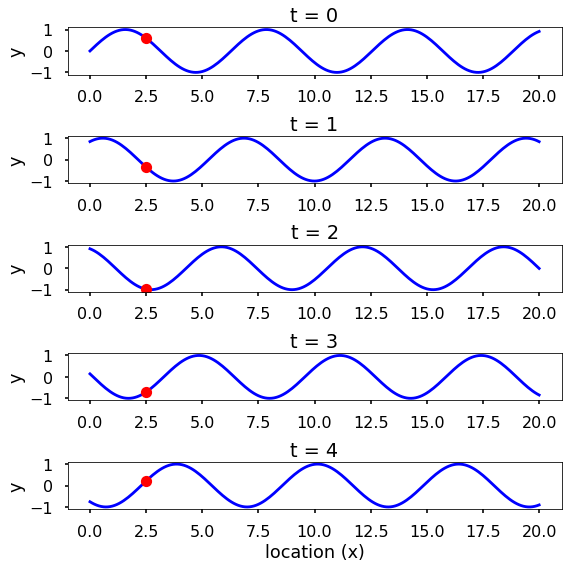

In [ ]:
fig = plt.figure(figsize = (8,8))

times = np.arange(5)

n = len(times)

for t in times:
    plt.subplot(n, 1, t+1)
    y = np.sin(x + t)
    plt.plot(x, y, 'b')
    plt.plot(x[25], y [25], 'ro')
    plt.ylim(-1.1, 1.1)
    plt.ylabel('y')
    plt.title(f't = {t}')

plt.xlabel('location (x)')
plt.tight_layout()
plt.show()

## Discrete Fourier Transform (DFT)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

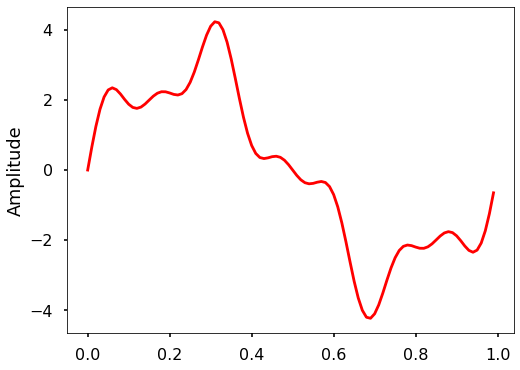

In [ ]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5*np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8,6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [ ]:
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.


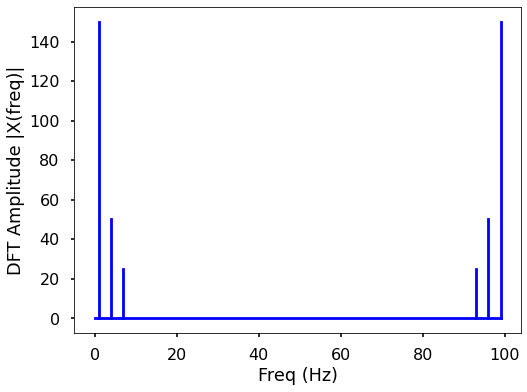

In [ ]:
X = DFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


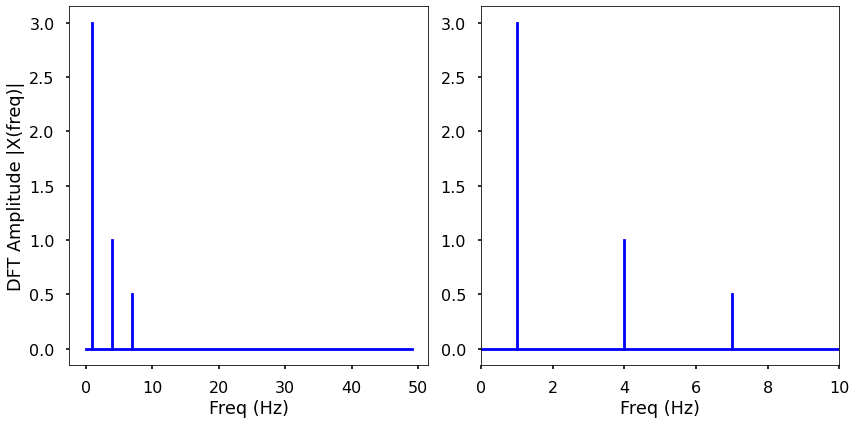

In [ ]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app


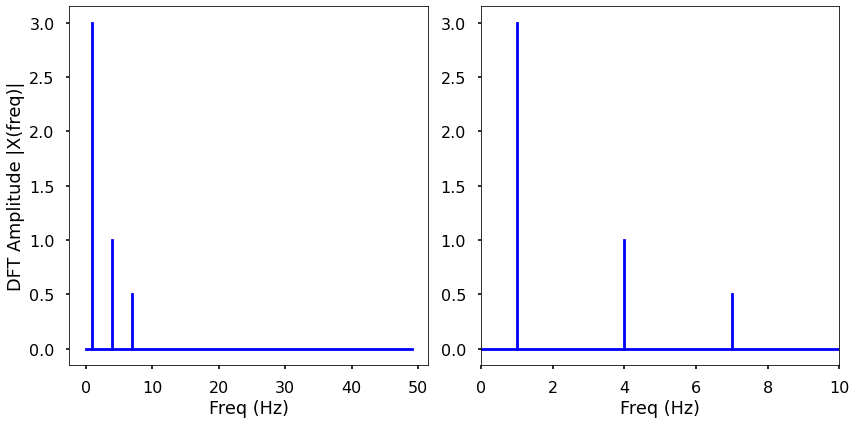

In [ ]:
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.xlim(0, 10)
plt.tight_layout()
plt.show()

## Fast Fourier Transform (FFT)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

In [ ]:
def DFT_slow(x):
  """Compute the discrete Fourier Transform of the 1D array x"""
  x = np.asarray(x, dtype=float)
  N = x.shape[0]
  n = np.arange(N)
  k = n.reshape((N, 1))
  M = np.exp(-2j * np.pi * k * n / N)
  return np.dot(x, M)

In [ ]:
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [ ]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

10 loops, best of 5: 123 ms per loop
The slowest run took 4.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 15.7 µs per loop


In [ ]:
def FFT(x):
  """
  A recursive implementation of
  the 1D Cooley - Tukey FFT, the
  input should have a length of
  power of 2
  """

  N = len(x)

  if N == 1:
    return x
  else:
    X_even = FFT(x[::2])
    X_odd = FFT(x[1::2])
    factor = \
      np.exp(-2j*np.pi*np.arange(N)/N)

    X = np.concatenate(\
            [X_even + factor[:int(N/2)]*X_odd,
             X_even + factor[int(N/2):]*X_odd])
    return X

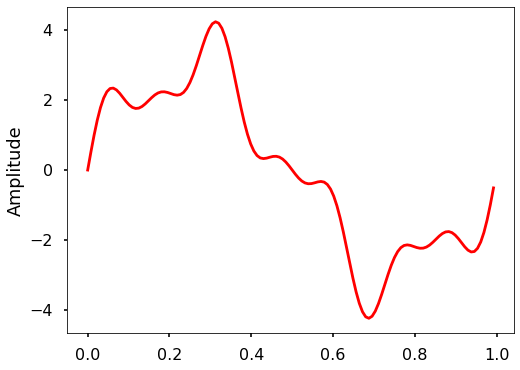

In [4]:
# Sampling rate
sr = 128
# Samping interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7
x += 0.5 * np.sin(2*np.pi*freq*t)

plt.figure(figsize=(8,6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


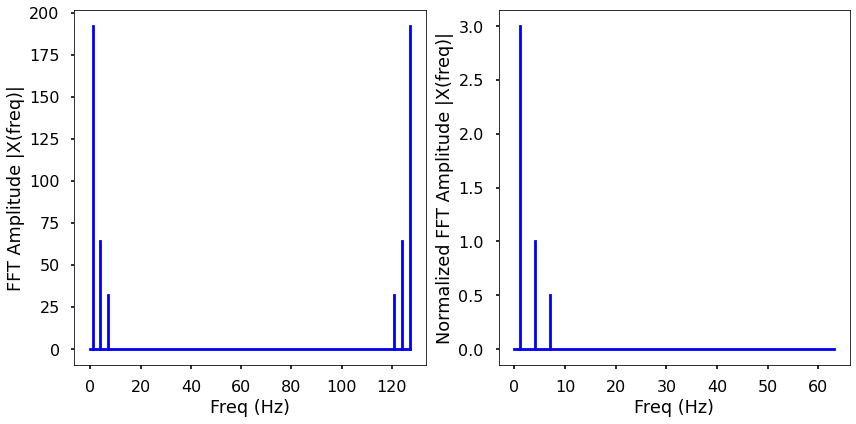

In [ ]:
X=FFT(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

# Get the one-sided specturm
n_oneside = N//2
# get the one side frequency
f_oneside = freq[:n_oneside]

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(122)
plt.stem(f_oneside, abs(X_oneside), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Normalized FFT Amplitude |X(freq)|')
plt.tight_layout()
plt.show()

## FFT in Numpy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


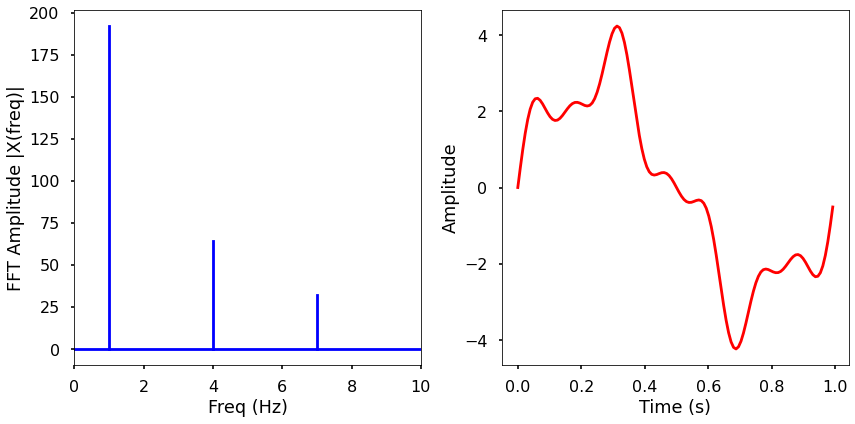

In [7]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

## FFT in Scipy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


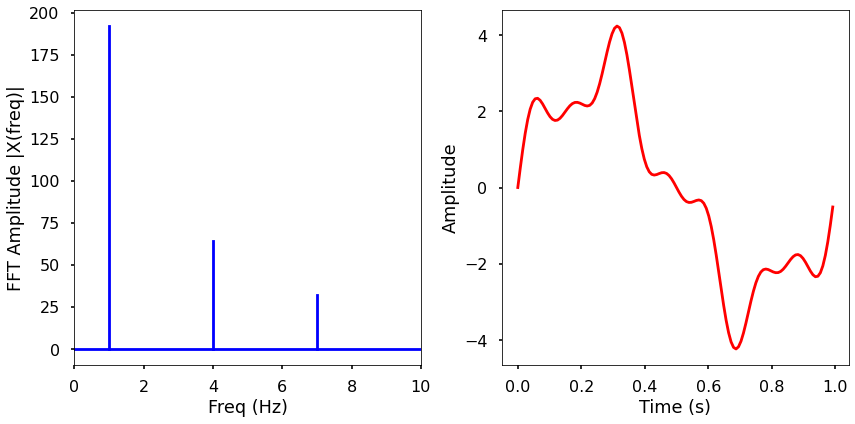

In [8]:
from scipy.fftpack import fft, ifft

X = fft(x)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

### Filtering a signal using FFT

In [30]:
import pandas as pd
from scipy.fftpack import fftfreq

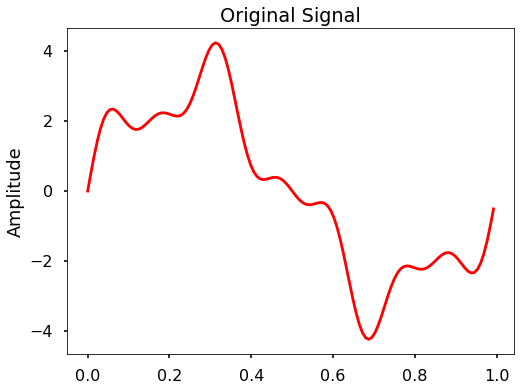

In [36]:
plt.figure(figsize=(8,6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.title('Original Signal')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


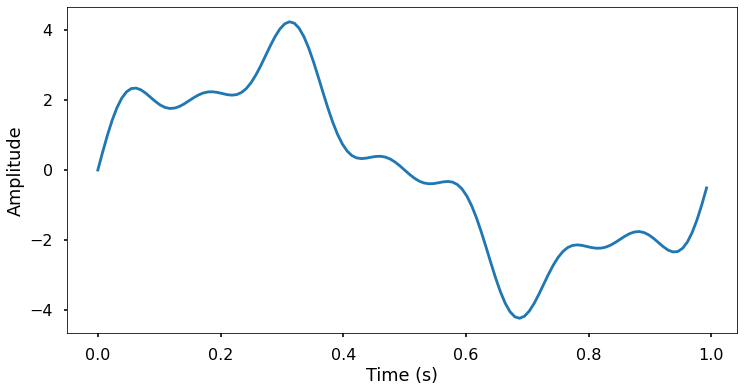

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


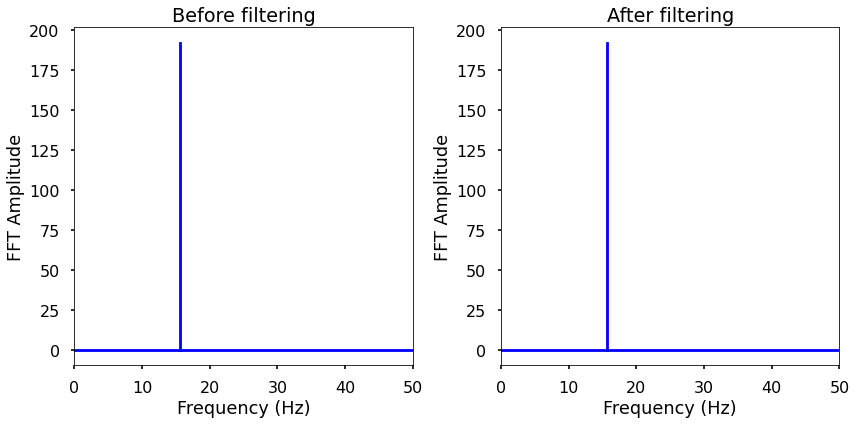

In [40]:
# FFT the signal
sig_fft = fft(x)
# copy the FFT results
sig_fft_filtered = sig_fft.copy()

# obtain the frequencies using scipy function
freq = fftfreq(len(x), d=1./2000)

# define the cut-off frequency
cut_off = 6

# high-pass filter by assign zeros to the 
# FFT amplitudes where the absolute 
# frequencies smaller than the cut-off 
sig_fft_filtered[np.abs(freq) < cut_off] = 0

# get the filtered signal in time domain
filtered = ifft(sig_fft_filtered)

# plot the filtered signal
plt.figure(figsize = (12, 6))
plt.plot(t, filtered)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# plot the FFT amplitude before and after
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, np.abs(sig_fft), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('Before filtering')
plt.xlim(0, 50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.subplot(122)
plt.stem(freq, np.abs(sig_fft_filtered), 'b', \
         markerfmt=" ", basefmt="-b")
plt.title('After filtering')
plt.xlim(0, 50)
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude')
plt.tight_layout()
plt.show()

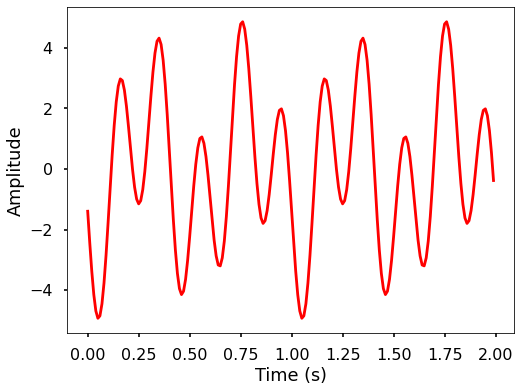

In [41]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,2,ts)

freq = 5.
x = 3*np.sin(2*np.pi*freq*t + 3)

freq = 2
x += 2*np.sin(2*np.pi*freq*t - 2)


plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

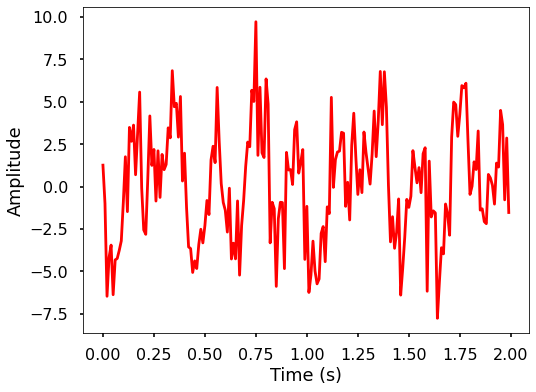

In [42]:
np.random.seed(10)
x_noise = x + \
  np.random.normal(0, 2, size = len(x))

plt.figure(figsize = (8, 6))
plt.plot(t, x_noise, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')
plt.show()

# **25. Introduction to Machine Learning**

## Classification

In [43]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import classification_report

plt.style.use('seaborn-poster')
%matplotlib inline

In [44]:
# import the iris data
iris = datasets.load_iris()

print(iris.feature_names)
# only print the first 10 samples
print(iris.data[:10])
print('We have %d data samples with %d \
    features'%(iris.data.shape[0], iris.data.shape[1]))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
We have 150 data samples with 4     features


In [46]:
print(iris.target_names)
print(set(iris.target))

['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [47]:
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))
print('We have %d classes in the data'%(n_class))

We have 3 classes in the data


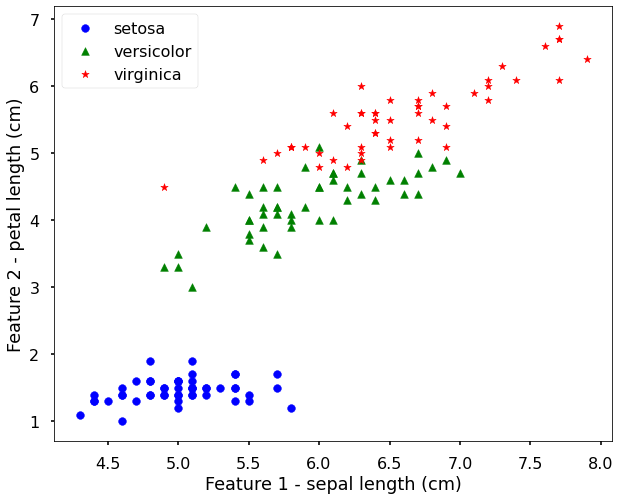

In [52]:
# Let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
plt.figure(figsize=(10,8))
for i, c, s in (zip(range(n_class), colors, symbols)):
  ix = y == i
  plt.scatter(X[:,0][ix], X[:, 1][ix], \
              color = c, marker = s, s=60, \
              label = target_names[i])
  
plt.legend(loc=2, scatterpoints = 1)
plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

In [53]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

# Train the classifier with data
clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

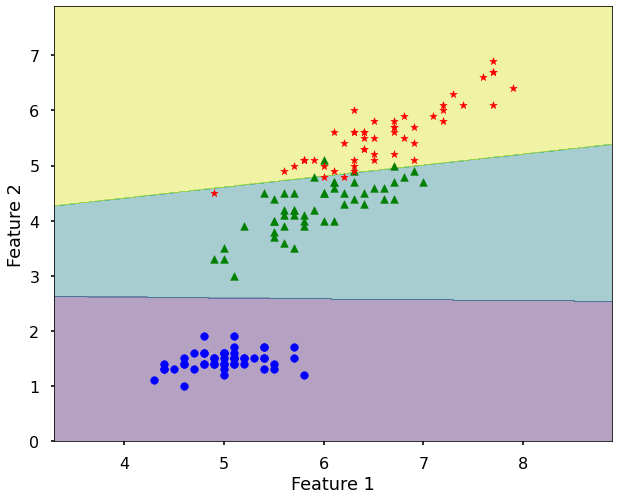

In [55]:
# Plotting decision regions
def plot_desicion_boundary(X, y, clf, title = None):
    '''
    Helper function to plot the decision boundary for the SVM
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    for i, c, s in (zip(range(n_class), colors, symbols)):
        ix = y == i
        plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                    color = c, marker = s, s = 60, \
                    label = target_names[i])
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
plot_desicion_boundary(X, y, clf)

## Reggression

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-poster')
%matplotlib inline

<ErrorbarContainer object of 3 artists>

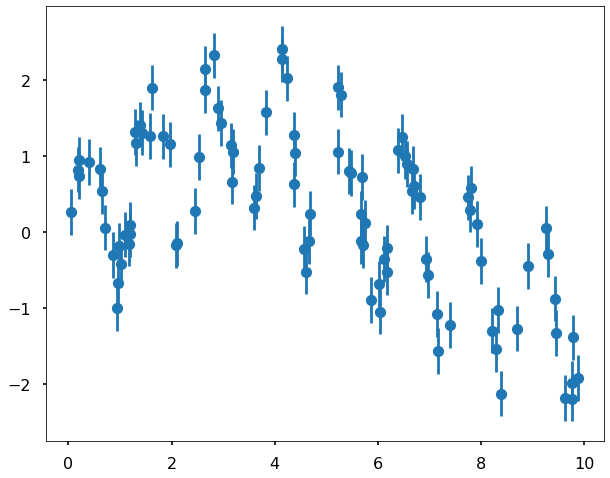

In [57]:
np.random.seed(0)
x = 10 * np.random.rand(100)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * np.random.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

plt.figure(figsize = (10,8))
y = model(x)
plt.errorbar(x, y, 0.3, fmt='o')

In [58]:
from sklearn.neural_network import MLPRegressor

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


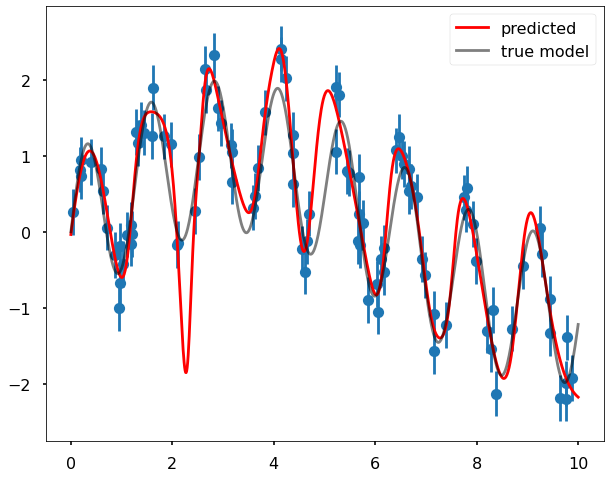

In [59]:
mlp = MLPRegressor(hidden_layer_sizes=(200,200,200), \
                   max_iter = 2000, solver='lbfgs', \
                   alpha=0.01, activation = 'tanh', \
                   random_state = 8)

xfit = np.linspace(0, 10, 1000)
ytrue = model(xfit, 0)
yfit = mlp.fit(x[:, None], y).predict(xfit[:, None])

plt.figure(figsize = (10,8))
plt.errorbar(x, y, 0.3, fmt='o')
plt.plot(xfit, yfit, '-r', label = 'predicted', \
         zorder = 10)
plt.plot(xfit, ytrue, '-k', alpha=0.5, \
         label = 'true model', zorder = 10)
plt.legend()
plt.show()

## Clustering

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
plt.style.use('seaborn-poster')
%matplotlib inline

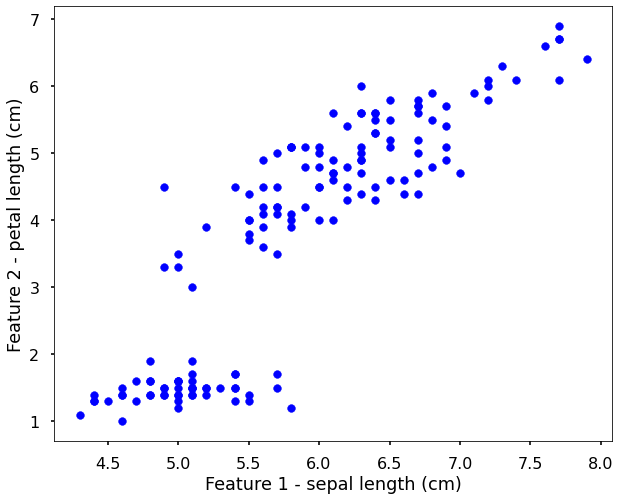

In [61]:
# import the iris data
iris = datasets.load_iris()
# let's just use two features, so that we can 
# easily visualize them
X = iris.data[:, [0, 2]]
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# get the classes
n_class = len(set(y))

# let's have a look of the data first
plt.figure(figsize = (10,8))

plt.scatter(X[:, 0], X[:, 1], \
            color = 'b', marker = 'o', s = 60)

plt.xlabel('Feature 1 - ' + feature_names[0])
plt.ylabel('Feature 2 - ' + feature_names[2])
plt.show()

In [62]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3, random_state = 0)
kmean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

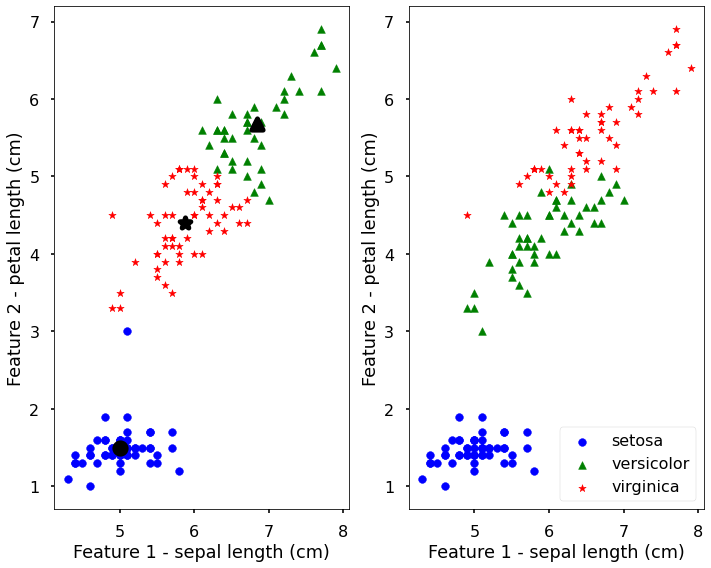

In [64]:
# let's have a look of the data first
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
for i, c, s in (zip(range(n_class), colors, symbols)):
    ix = kmean.labels_ == i
    ax.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    loc = kmean.cluster_centers_[i]
    ax.scatter(loc[0], loc[1], color = 'k', \
               marker = s, linewidth = 5)
    
    ix = y == i
    ax2.scatter(X[:, 0][ix], X[:, 1][ix], \
                color = c, marker = s, s = 60, \
                label = target_names[i])
    

plt.legend(loc = 4, scatterpoints = 1)
ax.set_xlabel('Feature 1 - ' + feature_names[0])
ax.set_ylabel('Feature 2 - ' + feature_names[2])
ax2.set_xlabel('Feature 1 - ' + feature_names[0])
ax2.set_ylabel('Feature 2 - ' + feature_names[2])
plt.tight_layout()
plt.show()

In [65]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
